<a href="https://colab.research.google.com/github/ValentineFil/-Projects_in_Pytorch/blob/main/ML1_1_%D0%9F%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Технологии анализа данных и машинного обучения/Парная регрессия/MGNT_101001_171001.txt')
df2 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Технологии анализа данных и машинного обучения/Парная регрессия/YNDX_101001_171001.txt')

In [ ]:
df = pd.merge(df1, df2, on='<DATE>')

In [ ]:
df1.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MGNT,D,20101001,0,3800.00,12669
1,MGNT,D,20101004,0,3746.97,3899
2,MGNT,D,20101005,0,3669.99,22660
3,MGNT,D,20101006,0,3664.87,1302
4,MGNT,D,20101007,0,3611.27,7101


In [ ]:
df2.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,YNDX,D,20140604,0,1170.0,35146
1,YNDX,D,20140605,0,1145.1,24973
2,YNDX,D,20140606,0,1163.0,7889
3,YNDX,D,20140609,0,1172.1,7304
4,YNDX,D,20140610,0,1170.0,3207


In [ ]:
df.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,MGNT,D,20140604,0,8970.0,99632,YNDX,D,0,1170.0,35146
1,MGNT,D,20140605,0,8928.8,130492,YNDX,D,0,1145.1,24973
2,MGNT,D,20140606,0,8980.0,166548,YNDX,D,0,1163.0,7889
3,MGNT,D,20140609,0,8949.0,68447,YNDX,D,0,1172.1,7304
4,MGNT,D,20140610,0,9100.0,120241,YNDX,D,0,1170.0,3207


In [ ]:
df = (df-df.mean())/df.std()*50+200
x = df['<CLOSE>_x']
y = df['<CLOSE>_y']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


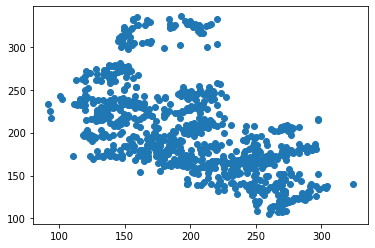

In [ ]:
plt.scatter(x, y)
plt.show()

# EXP 1

In [ ]:
class hyp(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [ ]:
hyp = hyp()
hyp_err = hyp.error(x, y)
print(hyp.predict(0))
print(hyp.predict(100))
print("initial error:", hyp_err)

0
0
initial error: 21248.508353221958


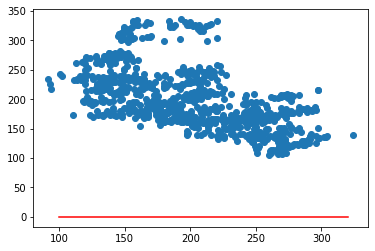

In [ ]:
x0 = np.linspace(100, 320, 100)
y0 = hyp.predict(x0)
plt.scatter(x, y)
plt.plot(x0, y0, 'r')
plt.show()

# EXP 2

In [ ]:
hyp.BGD(x, y)
hyp_err = hyp.error(x, y)
print("error after gradient descent:", hyp_err)

error after gradient descent: 25898.2468333387


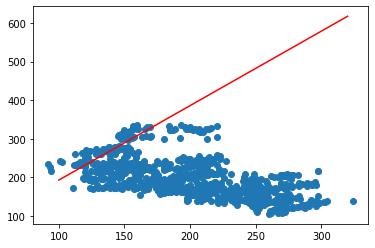

In [ ]:
x0 = np.linspace(100, 320, 100)
y0 = hyp.predict(x0)
plt.scatter(x, y)
plt.plot(x0, y0, 'r')
plt.show()

# EXP 3

In [ ]:
class hyp(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err      
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = hyp()
steps, errors = hyp.BGD(x, y)
hyp_err = hyp.error(x, y)
print("error after gradient descent:", hyp_err)

error after gradient descent: 3728.3546747614255


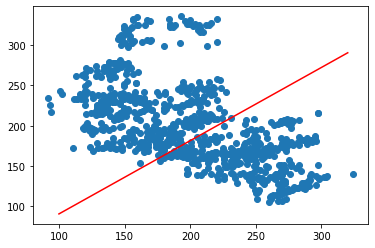

In [ ]:
x0 = np.linspace(100, 320, 100)
y0 = hyp.predict(x0)
plt.scatter(x, y)
plt.plot(x0, y0, 'r')
plt.show()

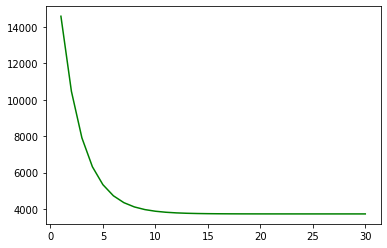

In [ ]:
plt.plot(steps, errors, 'g')
plt.show()